In [9]:
import pdfplumber
import glob
import os
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import numpy as np
import stopwordsiso as stopwords
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from unicodedata import normalize

In [10]:
nato_langs = [
    "sq",
    "fr",
    "bg",
    "en",
    "hr",
    "cs",
    "da",
    "et",
    "fi",
    "de",
    "el",
    "hu",
    "it",
    "lv",
    "lt",
    "nl",
    "mk",
    "no",
    "pl",
    "pt",
    "ro",
    "sk",
    "sl",
    "es",
    "sv",
    "tr",
]
sw = list(stopwords.stopwords(langs=nato_langs))
sw.remove("ai")

In [11]:
countries = [
    "Albania",
    "Belgium",
    "Bulgaria",
    "Canada",
    "Croatia",
    "Czech Republic",
    "Denmark",
    "Estonia",
    "Finland",
    "France",
    "Germany",
    "Greece",
    "Hungary",
    "Iceland",
    "Italy",
    "Latvia",
    "Lithuania",
    "Luxembourg",
    "Montenegro",
    "Netherlands",
    "North Macedonia",
    "Norway",
    "Poland",
    "Portugal",
    "Romania",
    "Slovakia",
    "Slovenia",
    "Spain",
    "Sweden",
    "Turkey",
    "United Kingdom",
    "United States",
]

military_df = pd.DataFrame(columns=["Country", "Document", "Text"])
security_df = pd.DataFrame(columns=["Country", "Document", "Text"])
cybersecurity_df = military_df = pd.DataFrame(columns=["Country", "Document", "Text"])

In [12]:
from unicodedata import normalize


def replace_ptbr_char_by_word(word):
    """Will remove the encode token by token"""
    word = str(word)
    word = normalize("NFKD", word).encode("ASCII", "ignore").decode("ASCII")
    return word


def remove_pt_br_char_by_text(text):
    """Will remove the encode using the entire text"""
    text = str(text)
    text = " ".join(
        replace_ptbr_char_by_word(word) for word in text.split() if word not in sw
    )
    return text

In [13]:
for country in countries:
    pdfs = glob.glob(os.getcwd() + f"/documents/{country}/" + "*.pdf")
    for file in pdfs:
        if "cyber" in file:
            with pdfplumber.open(file) as pdf:
                text = "".join(
                    [page.extract_text_simple().replace("\n", "") for page in pdf.pages]
                )
                cybersecurity_df.loc[len(cybersecurity_df), "Country"] = country
                cybersecurity_df.loc[len(cybersecurity_df), "Document"] = file[
                    file.rfind("/") + 1 :
                ]
                cybersecurity_df.loc[len(cybersecurity_df), "Text"] = text
cybersecurity_df["Text"] = cybersecurity_df["Text"].apply(remove_pt_br_char_by_text)

In [14]:
for country in countries:
    pdfs = glob.glob(os.getcwd() + f"/documents/{country}/" + "*.pdf")
    for file in pdfs:
        if "military" in file:
            with pdfplumber.open(file) as pdf:
                text = "".join(
                    [page.extract_text_simple().replace("\n", "") for page in pdf.pages]
                )
                military_df.loc[len(military_df), "Country"] = country
                military_df.loc[len(military_df), "Document"] = file[
                    file.rfind("/") + 1 :
                ]
                military_df.loc[len(military_df), "Text"] = text
military_df["Text"] = military_df["Text"].apply(remove_pt_br_char_by_text)

In [15]:
for country in countries:
    pdfs = glob.glob(os.getcwd() + f"/specialized word clouds/{country}/" + "*.pdf")
    for file in pdfs:
        if "security" in file:
            with pdfplumber.open(file) as pdf:
                text = "".join(
                    [page.extract_text_simple().replace("\n", "") for page in pdf.pages]
                )
                security_df.loc[len(security_df), "Country"] = country
                security_df.loc[len(security_df), "Document"] = file[
                    file.rfind("/") + 1 :
                ]
                security_df.loc[len(security_df), "Text"] = text
security_df["Text"] = security_df["Text"].apply(remove_pt_br_char_by_text)

In [16]:
cybersecurity_df.to_csv("./cybersecurity_corpus.csv", index=False, escapechar="\\")
military_df.to_csv("./military_corpus.csv", index=False, escapechar="\\")
security_df.to_csv("./security_corpus.csv", index=False, escapechar="\\")

In [17]:
cybersecurity_txt = pd.read_csv("./cybersecurity_corpus.csv")["Text"].dropna().to_list()
military_txt = pd.read_csv("./military_corpus.csv")["Text"].dropna().to_list()
security_txt = pd.read_csv("./security_corpus.csv")["Text"].dropna().to_list()
count_vectorizer = CountVectorizer(stop_words=sw)
cybersecurity_X = count_vectorizer.fit_transform(cybersecurity_txt)
military_X = count_vectorizer.fit_transform(military_txt)
security_X = count_vectorizer.fit_transform(security_txt)

/opt/homebrew/Caskroom/miniforge/base/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ain', 'daren', 'hadn', 'herse', 'himse', 'idr', 'mayn', 'mightn', 'mustn', 'myse', 'needn', 'npr', 'oughtn', 'oz', 'prbl', 'pribl', 'printr', 'quelqu', 'shan', 'stb', 'ted', 'ει', 'εινα', 'εμη', 'εξια', 'επει', 'ηθεν', 'ηλα', 'ηποτε', 'ια', 'ιακοπα', 'ιαν', 'ιαρκως', 'ιας', 'ιες', 'ικα', 'ικο', 'ικοι', 'ικος', 'ικου', 'ικους', 'ιο', 'ιοι', 'ιολου', 'ιον', 'ιος', 'ιου', 'ιους', 'ιπλα', 'ιχως', 'ιων', 'ιως', 'ον', 'οποι', 'σχε', 'ταυτο', 'ταυτον', 'оda', 'ἀλλ'] not in stop_words.
  warnings.warn(


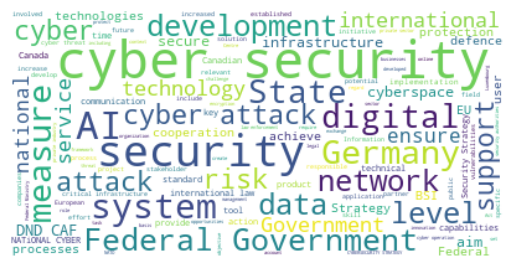

In [29]:
cybersecurity_wordcloud = WordCloud(background_color="white").generate(
    "".join(cybersecurity_txt)
)
plt.figure()
plt.imshow(cybersecurity_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

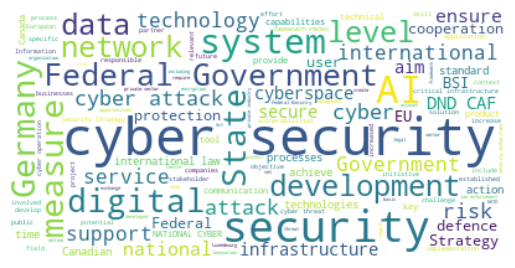

In [27]:
military_wordcloud = WordCloud(background_color="white").generate("".join(military_txt))
plt.figure()
plt.imshow(military_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

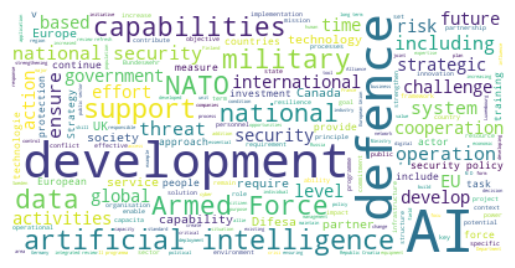

In [21]:
security_wordcloud = WordCloud(background_color="white").generate("".join(security_txt))
plt.figure()
plt.imshow(security_wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()